<a href="https://colab.research.google.com/github/heeyarun04/Pengolahan-Citra-Digital/blob/main/UTS_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<tr>
  <td width='80%' bgcolor='ffffff' color='000000'><figure>
  <center>
  <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTii2sAcJaAEd3BIBMvrFbxCQwvI6usKw34frwaBfhENVZUetsyIYjzl1U4yw&s' width='60%' height='100%'/>
  <br/>

  Lecturer : Ridwan Dwi Irawan, S.Kom., M.Kom <br/>
  Email: ridwan_dwiirawan@udb.ac.id <br/>
  </center>
  </figure>
  </td>
  <td bgcolor='ffffff' color='000000'>
  <h4> Technical Report Pengolahan Citra Digital </h4>
  <h4> Ujian Tengah Semester </h4>
  <p align='left' color='000000'>
  Judul : Laporan UTS <br/>
  Nama : Hiyarunnisa Kahes Waypi <br/>
  NIM : 200103098 <br/>
  Email : 202020967@mhs.udb.ac.id <br/>
  </p>
  </td>
</tr>
</table>


# Import Library

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# a) Baca citra menggunakan OpenCV
img = cv2.imread('uman.jpg')

# Soal 2
Gunakan konsep konvolusi untuk melakukan smoothing pada citra berwarna. Lakukan langkah-langkah berikut:

*   Baca citra "namalengkap.jpg" menggunakan library OpenCV (cv).
*   Terapkan konvolusi antara citra dan kernel dengan ukuran kernel 3x3 (terserah untuk kernel yang digunakan).
*   Tampilkan citra asli, identity, penajaman, blurring, dan hasil averaging pixe


In [8]:
# Pastikan citra telah terbaca dengan benar
if img is None:
    print("Gagal membaca citra.")
else:
    # Buat kernel untuk identity
    kernel_identity = np.array([[0, 0, 0],
                                [0, 1, 0],
                                [0, 0, 0]], np.float32)

    # Buat kernel untuk sharpening
    kernel_sharpening = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]], np.float32)

    # Buat kernel untuk blurring
    kernel_blurring = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]], np.float32) / 9

    # Buat kernel untuk averaging pixel
    kernel_size = (3, 3) # Adjust the kernel size as needed
    kernel_averaging = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])


1. Konvolusi Citra

Suatu citra digital didefiniskan sebagai  suatu fungsi f(x,y) terdiri  dari sejumlah baris dan  sejumlah kolom dengan x dan y adalah koordinat spasial, dan amplitude f di titik koordinat (x, y) dinamakan intensitas dari citra pada titik tersebut [1] [3]. Konvolusi dilakukan dengan mengalikan elemen-elemen pada dua buah matriks dan menjumlahkan hasilnya, sehingga terdapat keluaran nilai dari sebuah piksel yang merupakan hasil konvolusi.  Satu  dari  matriks  tersebut  merepresentasikan  citra  dan  yang  lain  merepresentasikan filter/tapis/kernel [4].

2. Pada penajaman citra,

Intensitas suatu citra akan diperkuat dengan melewatkan pada suatu tapis lolos atas (high pass filter).  Ada berbagai  macam kernel  konvolusi yang  membentuk high-pass filter,  ada yang menonjolkan arah-arah tertentu (vertikal, horisontal, diagonal, atau juga utara, selatan, barat dan timur) [4]. Penajaman citra bisa terjadi karena citra tersebut didiferensiasi (dikurangi) dengan matriks kernel (h). Hasil penjumlahan tiap elemen pada matriks kernel adalah 1.

In [9]:
# Terapkan konvolusi antara citra dan kernel untuk identity
img_identity = cv2.filter2D(img, -1, kernel_identity)

# Terapkan konvolusi antara citra dan kernel untuk penajaman
img_sharpening = cv2.filter2D(img, -1, kernel_sharpening)

# Terapkan konvolusi antara citra dan kernel untuk blurring
img_blurring = cv2.filter2D(img, -1, kernel_blurring)

# Terapkan konvolusi antara citra dan kernel untuk averaging pixel
img_averaging = cv2.filter2D(img, -1, kernel_averaging)

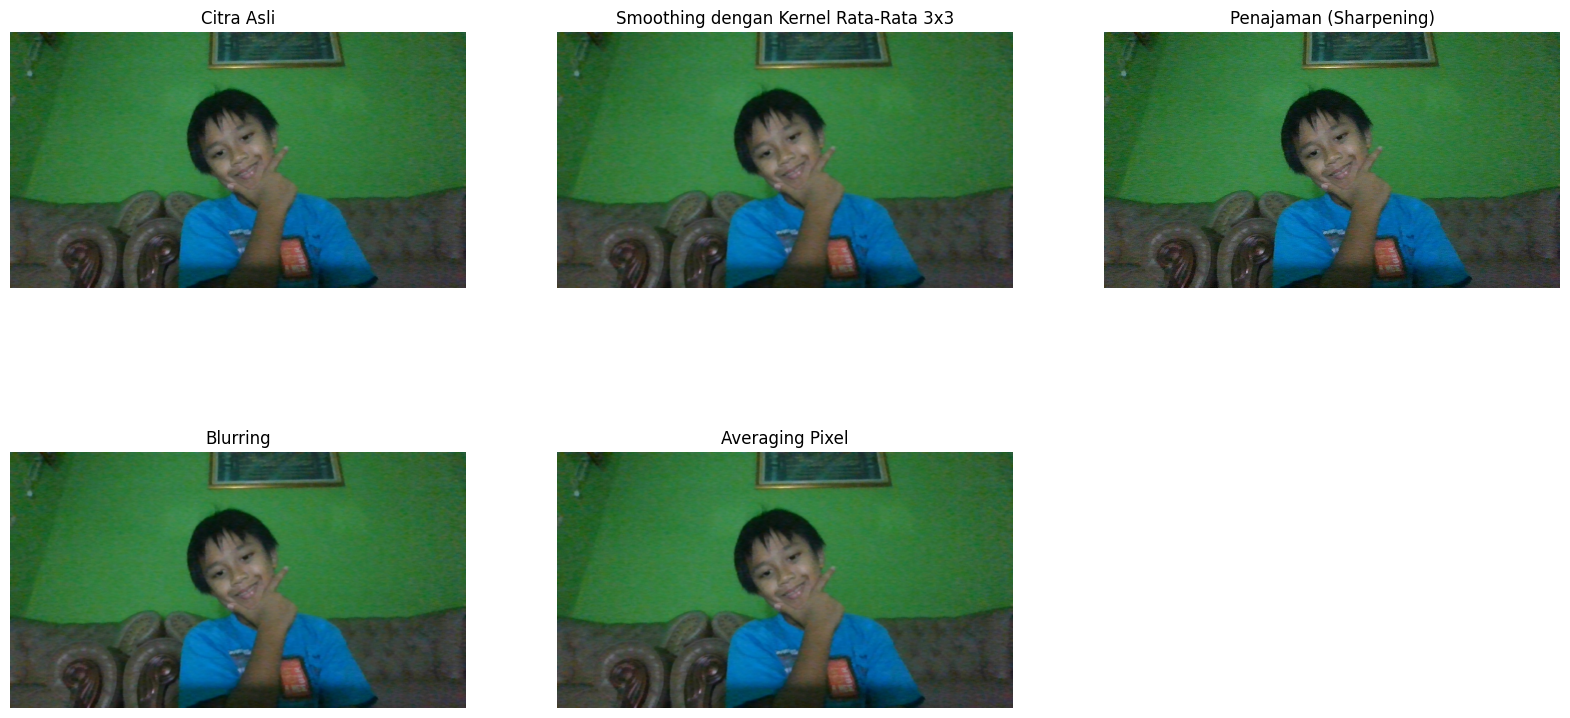

In [10]:

# Tampilkan citra asli, hasil smoothing, hasil penajaman, hasil blurring, dan hasil averaging pixel
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(img_blurring, cv2.COLOR_BGR2RGB))
plt.title('Smoothing dengan Kernel Rata-Rata 3x3')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(img_sharpening, cv2.COLOR_BGR2RGB))
plt.title('Penajaman (Sharpening)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img_blurring, cv2.COLOR_BGR2RGB))
plt.title('Blurring')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(img_averaging, cv2.COLOR_BGR2RGB))
plt.title('Averaging Pixel')
plt.axis('off')

plt.show()

# Soal 3
Lakukan segmentasi warna pada citra berwarna Grayscale untuk menampilkan hanya objek dengan warna tertentu. Lakukan langkah-langkah berikut:

*   Baca citra "nim.jpg" menggunakan library OpenCV
*   Tentukan rentang warna grayscale yang ingin di-segmentasi
*   Tampilkan citra asli dan hasil segmentasi
*   Tampilkan hasil dari histogram warna
*   Tampilkan hasil dari histogram grayscale




### Segmentasi citra
Segmentasi citra adalah kegiatan untuk membagi citra menjadi beberapa bagian atau region, yang bertujuan untuk mengisolasi atau menemukan suatu obyek di dalam citra.

In [11]:
# a) Baca citra menggunakan OpenCV
gambar = cv2.imread('uman.jpg')
# b) Rentang warna grayscale yang ingin di-segmentasi
lower_gray = np.array([100], dtype=np.uint8)
upper_gray = np.array([200], dtype=np.uint8)

In [12]:
# Segmentasi warna pada citra grayscale

#convert BGR ke RGB
gambar=cv2.cvtColor(gambar,cv2.COLOR_BGR2RGB)

#Konversi citra warna RGB menjadi citra grayscale
gray_gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

#Menciptakan mask berdasarkan rentang warna yang ditentukan pada citra grayscale
mask = cv2.inRange(gray_gambar, lower_gray, upper_gray)

#Menghasilkan citra hasil segmentasi dengan menerapkan masker yang telah dibuat sebelumnya ke citra asli
result = cv2.bitwise_and(gambar, gambar, mask=mask)


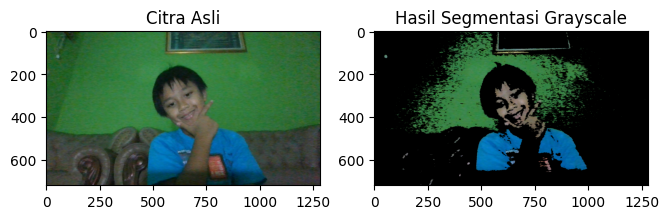

In [16]:
# c) Tampilkan citra asli dan hasil segmentasi
plt.figure(figsize=(12, 6))


plt.subplot(1,3,1)
plt.imshow(gambar)
plt.title('Citra Asli')

plt.subplot(1,3,2)
plt.imshow(result)
plt.title('Hasil Segmentasi Grayscale')

plt.show()

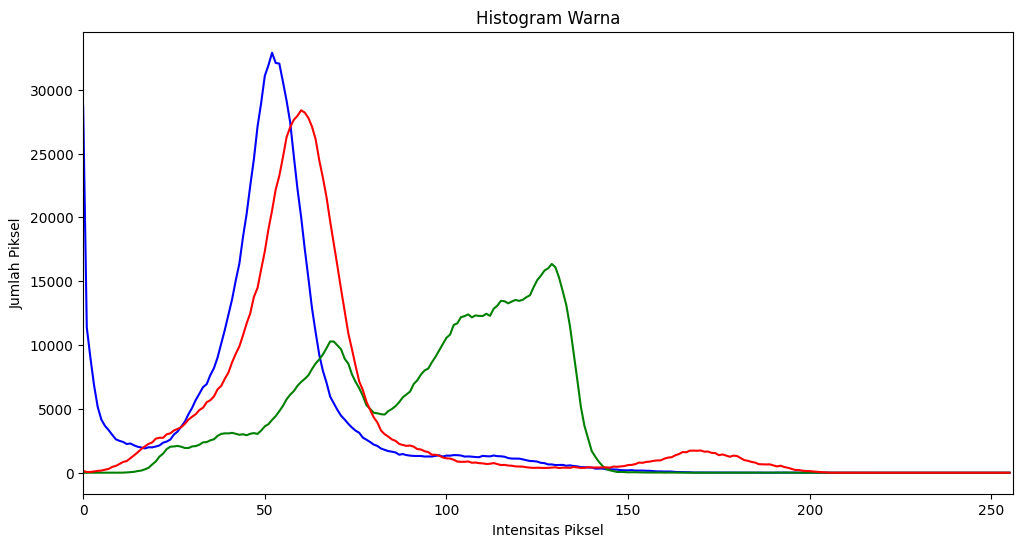

In [24]:
# d) Tampilkan histogram warna
colors = ('b', 'g', 'r')
plt.figure(figsize=(12, 6))
# plot histogram untuk setiap channel warna
for i, col in enumerate(colors):
    hist = cv2.calcHist([gambar], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.title('Histogram Warna')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

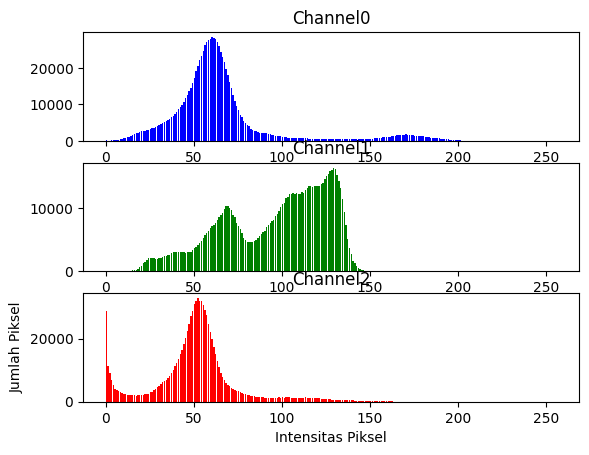

In [27]:
(B,G,R) = cv2.split(img)

colors = ("b","g","r")

fig, axs = plt.subplots(3)

# Plot histogram untuk setiap channel
for i, channel, ax in zip(range(3),(B,G,R),axs):
  hist,bins = np.histogram(channel.ravel(),256,[0,256])
  ax.bar(range(len(hist)), hist, align='edge', color=colors[i])
  ax.set_title(f'Channel{i}')

plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.show

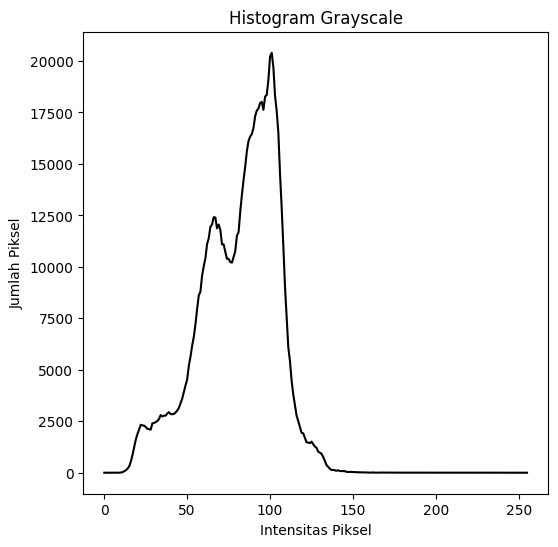

In [25]:
# e) Tampilkan histogram grayscale
plt.figure(figsize=(6, 6))

hist_gray = cv2.calcHist([gray_gambar], [0], None, [256], [0, 256])
plt.plot(hist_gray, color='black')
plt.title('Histogram Grayscale')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.show()

In [ ]:
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

hist, bins = np.histogram


# Soal 4
Lakukan equalisasi gambar

*   Baca citra "nim.jpg" menggunakan library OpenCV
*   Tentukan rentang warna grayscale yang ingin di-segmentasi
*   Tampilkan citra asli dan hasil segmentasi
*   Tampilkan hasil dari Histogram Gambar Asli, Equalisasi Histogram, dan brightened image histogram




In [44]:
# a) Baca citra menggunakan OpenCV
gambar = cv2.imread('uman.jpg')

# b) Rentang warna grayscale yang ingin disegmentasi
lower_gray = np.array([100], dtype=np.uint8)
upper_gray = np.array([200], dtype=np.uint8)

In [ ]:
# c) Tampilkan citra asli dan hasil segmentasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Hasil Segmentasi Grayscale')
plt.axis('off')

plt.show()

In [ ]:
# Mengubah gambar dari BGR ke RGB
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

# Menghitung histogram warna
histogram = cv2.calcHist([gambar_rgb], [0,1,2], None, [256,256,256], [0,256,0,256,0,256])

# Plot histogram warna
fig = plt.figure(figsize=(10,5))

# Plot histogram untuk setiap channel warna
for i, color in enumerate(['r','g','b']):
  hist = cv2.calcHist([gambar_rgb], [i], None, [256], [0,256])
  plt.plot(hist, color=color)
  plt.xlim([0,256])
